In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from src.env.dunderbot_env import DunderBotEnv
import src.run as run
import src.load as load

loading config from config/config.yml
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# TODO:

- Reinstate portfolio features
- Refactor `_take_action` (might be something off in some calculations, also update terminology)
- Refactor current reward and add some new ones
- Understand what should belong in what timestep (also decide on which price to plot as a result)
- figure out how to normalize values properly
    * do we have to account for prediction as well? That is, can/should we predict using values outside of 0-1 range?
- understand the rendering, especially during learning
- setup train/test functionality (separate reset functions? Multiple time periods for testing?)
- add distributions of actions as output during predition
- lock down the seeds (and decide in config from a few specific ones)
- setup performance output, what we need to make data driven decision
- Add benchmarks
- Find as long time series of BTCUSD hourly (and daily) data as possible, quite shortright now
- Add smallest amount of bitcoin we can own, as well as trading precision
- Check float number type


# DONE: 
- add config
- modularize rewards
- own actions
- add more detailed actions for buy and sell amounts (still Discrete, I believe)
- wrap running code in function in main.py (to enable more dynamic data loading and train/test)
- own observations
- remove the bias when getting the observations (suggestion in the repo issues)
- download more interesting data and manually preprocess
- load interesting data, specified in config
- understand the time steps in learn and predict
- setup basic monitoring of training using TensorBoard
- Visualize basic performance
- Add support for fractions of shares

# Run

In [13]:
%%time
df = load.load_OHLC_data()
env = run.preprocess(df=df)
model = run.train(env=env, total_timesteps=40000)

--------------------------------------
| approxkl           | 0.00012113595 |
| clipfrac           | 0.0           |
| explained_variance | 6.4e-05       |
| fps                | 210           |
| n_updates          | 1             |
| policy_entropy     | 2.1970887     |
| policy_loss        | -0.0018831489 |
| serial_timesteps   | 128           |
| time_elapsed       | 0.000198      |
| total_timesteps    | 128           |
| value_loss         | 54215.543     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008926025  |
| clipfrac           | 0.0           |
| explained_variance | -3.1e-06      |
| fps                | 412           |
| n_updates          | 10            |
| policy_entropy     | 1.9683601     |
| policy_loss        | -0.0007544393 |
| serial_timesteps   | 1280          |
| time_elapsed       | 3.11          |
| total_timesteps    | 1280          |
| value_loss         | 34822620.0    |
-------------------------

--------------------------------------
| approxkl           | 0.00023482429 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 428           |
| n_updates          | 170           |
| policy_entropy     | 1.5610617     |
| policy_loss        | 0.0006404994  |
| serial_timesteps   | 21760         |
| time_elapsed       | 72.9          |
| total_timesteps    | 21760         |
| value_loss         | 21079677000.0 |
--------------------------------------
--------------------------------------
| approxkl           | 8.045504e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 415           |
| n_updates          | 180           |
| policy_entropy     | 1.5454614     |
| policy_loss        | -0.0005259842 |
| serial_timesteps   | 23040         |
| time_elapsed       | 76.2          |
| total_timesteps    | 23040         |
| value_loss         | 23461542000.0 |
-------------------------

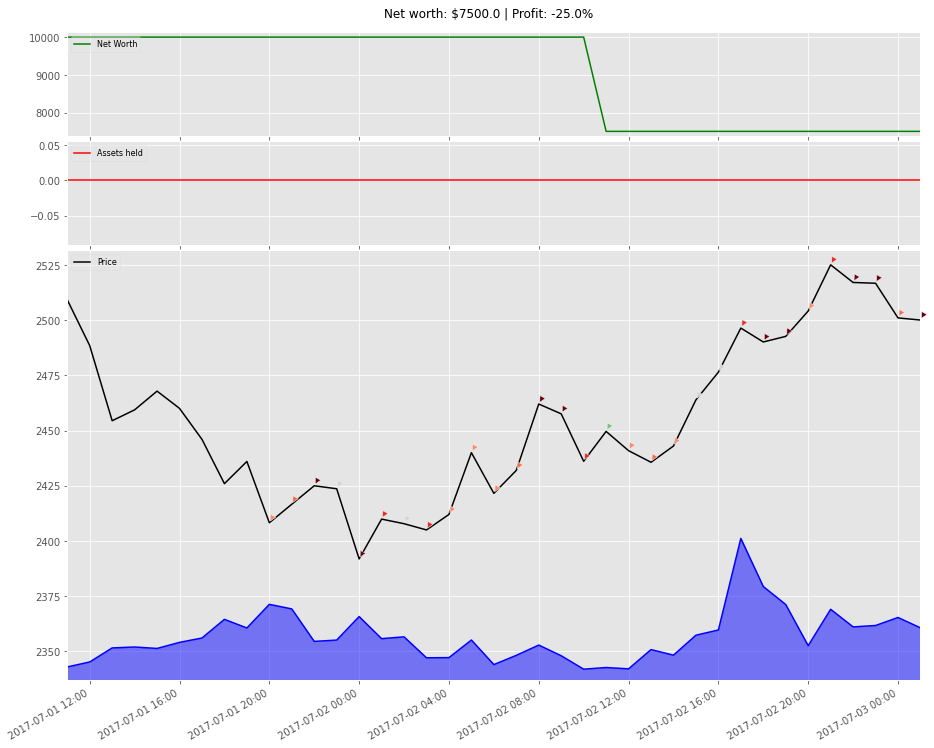

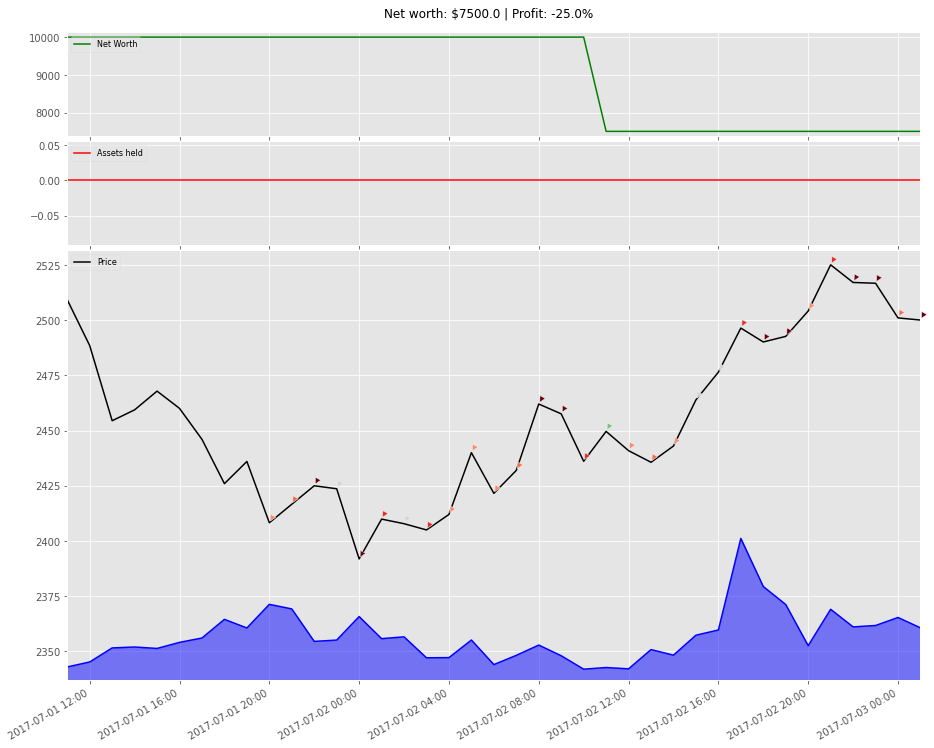

CPU times: user 4.84 s, sys: 186 ms, total: 5.03 s
Wall time: 5.01 s


In [132]:
%%time
run.predict(env=env, model=model, total_timesteps=30, rendermode='human')

In [67]:
import pickle
with open('all_dict_pred.pickle', 'rb') as f:
    x = pickle.load(f)
x

{'current_step': 39,
 'net_worths': [10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0,
  10000.0],
 'trades': [{'step': 9, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 10, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 11, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 12, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 13, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 14, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 16, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 18, 'amount': 0.0, 'total': 0.0, 'type': 'sell'},
  {'step': 19, 'amount': 0.0, 'total':

In [69]:
len(x['net_worths'])

39

In [70]:
x.keys()

dict_keys(['current_step', 'net_worths', 'trades', 'shares_held_hist'])